In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanishaj225/loancsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1


In [3]:

import os

path = "/root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1"
files = os.listdir(path)
print(files)

['loan.csv']


In [4]:
file_name = "loan.csv"
file_path = os.path.join(path, file_name)

import pandas as pd
data = pd.read_csv(file_path)
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:

df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


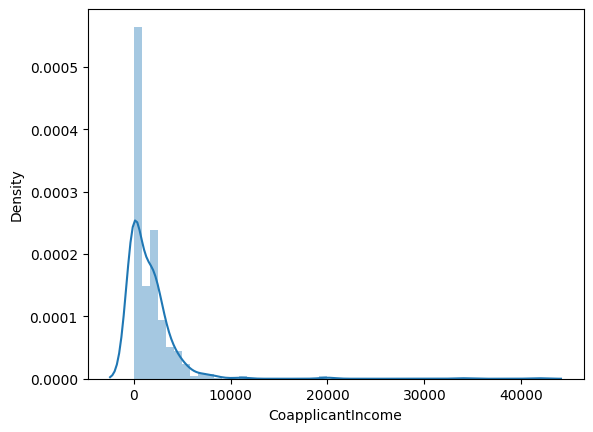

In [6]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

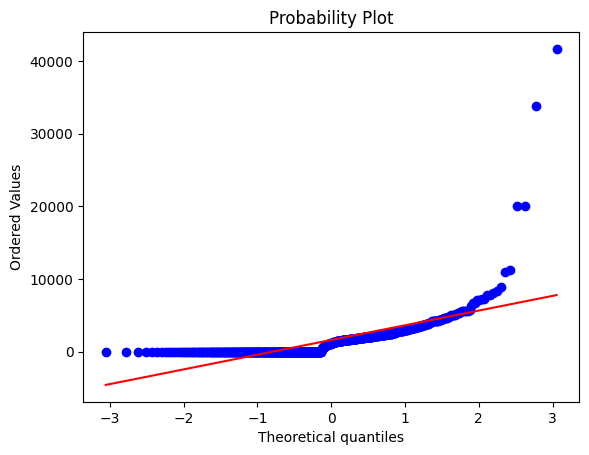

In [7]:
stats.probplot(df['CoapplicantIncome'], dist='norm', plot=plt)
plt.show()

In [8]:
df['CoapplicantIncome'].skew()

7.491531216657306

In [9]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

In [10]:
iqr

2297.25

In [11]:
min_val = q1 - 1.5 * iqr
max_val = q3 + 1.5 * iqr

In [12]:
min_val,max_val

(-3445.875, 5743.125)

In [13]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].clip(lower=min_val, upper=max_val)

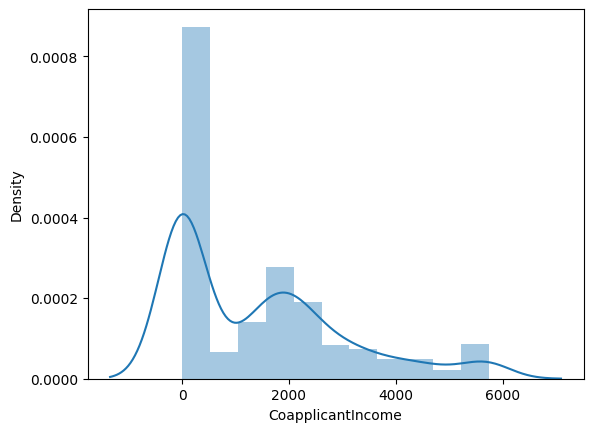

In [14]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [15]:
df['CoapplicantIncome'].skew()

1.012762761452279

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
ft = FunctionTransformer(func = np.log1p)

In [18]:
ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [19]:
df['CoapplicantIncome_transformed'] = ft.transform(df[['CoapplicantIncome']])

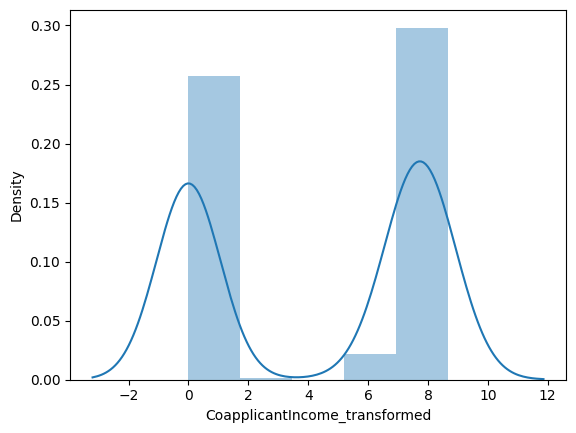

In [20]:
sns.distplot(df['CoapplicantIncome_transformed'])
plt.show()

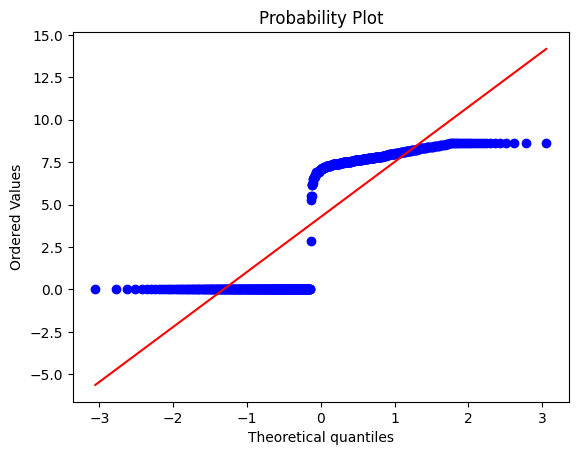

In [21]:
stats.probplot(df['CoapplicantIncome_transformed'], dist='norm', plot=plt)
plt.show()

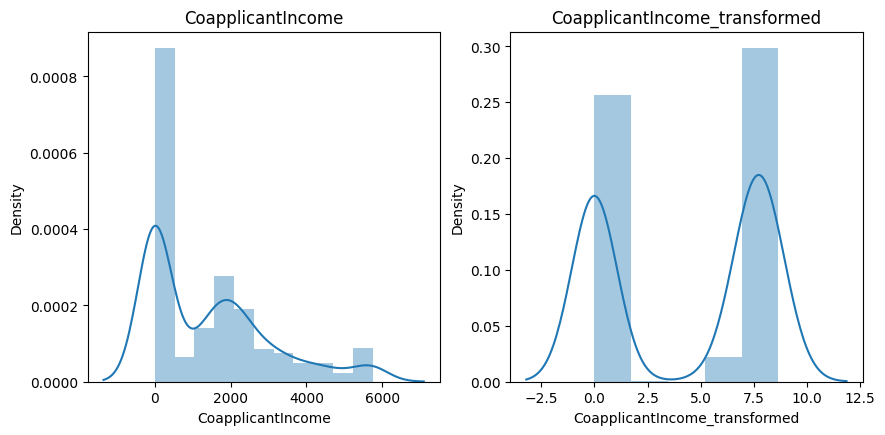

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('CoapplicantIncome')
sns.distplot(df['CoapplicantIncome'])
plt.subplot(2,2,2)
plt.title('CoapplicantIncome_transformed')
sns.distplot(df['CoapplicantIncome_transformed'])
plt.show()

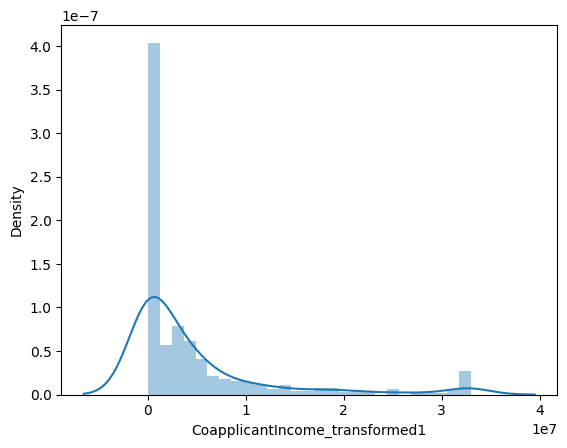

In [22]:
ft1 = FunctionTransformer(func= lambda x: x**2)
ft1.fit(df[['CoapplicantIncome']])
df['CoapplicantIncome_transformed1'] = ft1.transform(df[['CoapplicantIncome']])
sns.distplot(df['CoapplicantIncome_transformed1'])
plt.show()

In [23]:
df['CoapplicantIncome_transformed1'].skew()

2.3482162554994237

In [24]:
import scipy.stats as stats

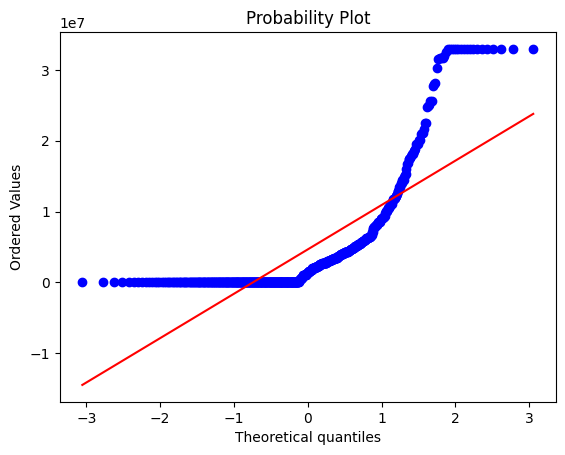

In [25]:
stats.probplot(df['CoapplicantIncome_transformed1'], dist='norm', plot=plt)
plt.show()

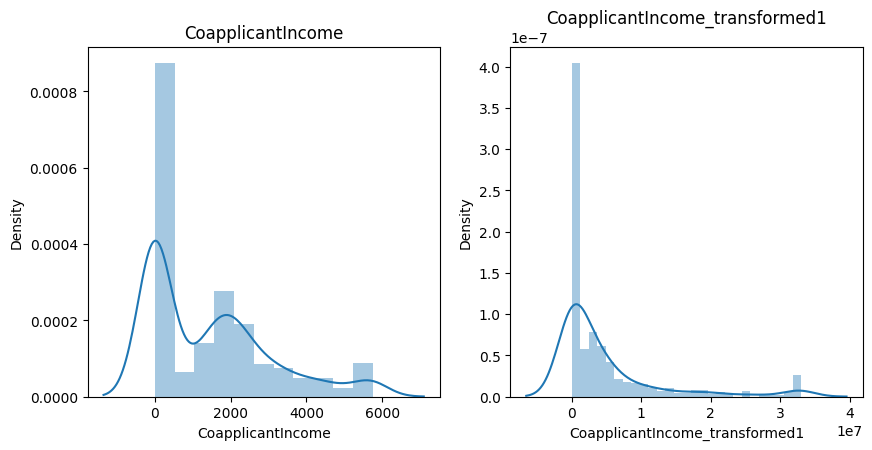

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('CoapplicantIncome')
sns.distplot(df['CoapplicantIncome'])
plt.subplot(2,2,2)
plt.title('CoapplicantIncome_transformed1')
sns.distplot(df['CoapplicantIncome_transformed1'])
plt.show()

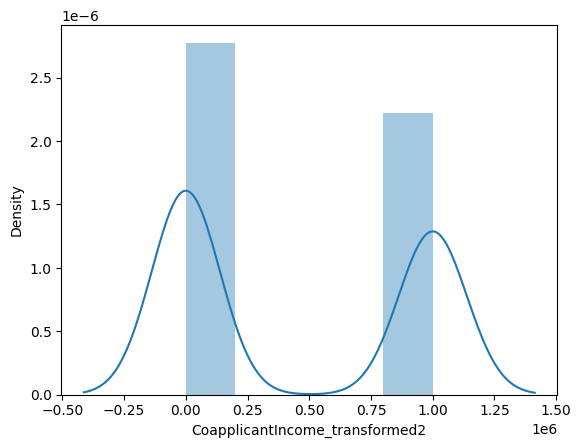

In [26]:
ft2 = FunctionTransformer(func= lambda x: 1/(x +0.000001))
ft2.fit(df[['CoapplicantIncome']])
df['CoapplicantIncome_transformed2'] = ft2.transform(df[['CoapplicantIncome']])
sns.distplot(df['CoapplicantIncome_transformed2'])
plt.show()

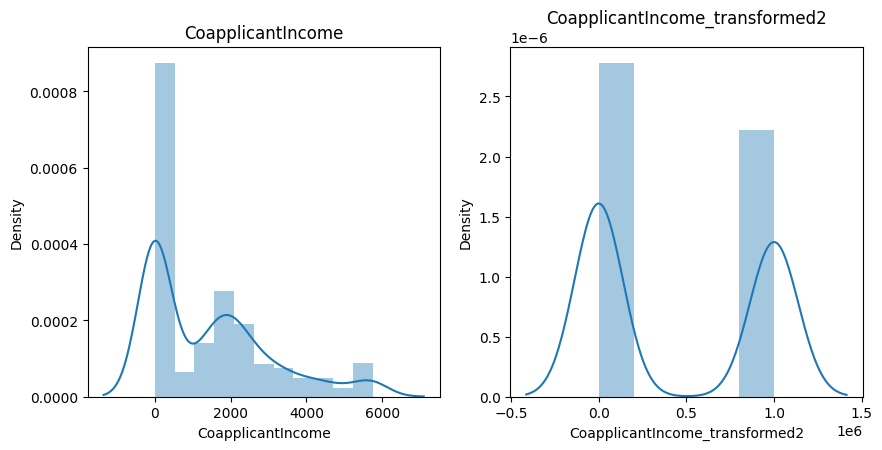

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('CoapplicantIncome')
sns.distplot(df['CoapplicantIncome'])
plt.subplot(2,2,2)
plt.title('CoapplicantIncome_transformed2')
sns.distplot(df['CoapplicantIncome_transformed2'])
plt.show()

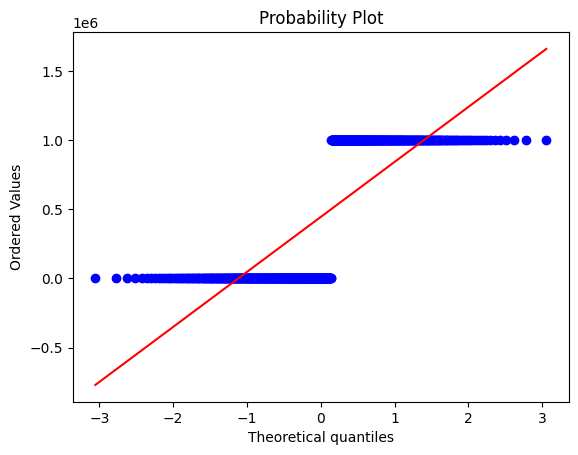

In [27]:
stats.probplot(df['CoapplicantIncome_transformed2'], dist='norm', plot=plt)
plt.show()